<a href="https://colab.research.google.com/github/AlexAlexeyuk/AlexAlexeyuk/blob/master/Alexeyuk_Spam_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Цель**: оценить работоспособность метода К-средних для классификации текста. Сравнить с другими методами классификации.
**Задачи**: 

1.   Сделать все буквы малыми
2.   Убрать "стоп слова"
3.   Провести стеммизацию
4.   Провести лемматизацию
5.   Оценить каком метод "очистки" слов более работоспособен
6.   Провести токенизацию
7.   Конвертировать слова в векторы
8.   Конвертировать слова в предложениях в векторы
9.   Кластеризовать данные
10.  Провести классификацию другими алгоритмами
11.  Попробовать авто_машинное обучение




In [161]:
import numpy as np
import pandas as pd
import re
import nltk
import string
pd.options.mode.chained_assignment = None

full_df = pd.read_csv("/content/spam.csv", encoding='latin-1')
df = full_df.iloc[:,:2]
df = df.rename(columns={"v1":"target", "v2":"text"})

In [162]:
df["text"] = df["text"].str.lower()
df.head()

,target,text
0,ham,"go until jurong point, crazy.. available only in bugis n great wor..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives around here though"


In [163]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text_wo_punct"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head()

,target,text,text_wo_punct
0,ham,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...
1,ham,ok lar... joking wif u oni...,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...
3,ham,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say
4,ham,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though


In [164]:
stopwords = "i, me, my, myself, we, our, ours, ourselves, you, you're, you've, \
you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, \
she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, \
themselves, what, which, who, whom, this, that, that'll, these, those, am, is,\
 are, was, were, be, been, being, have, has, had, having, do, does, did, doing,\
  a, an, the, and, but, if, or, because, as, until, while, of, at, by, for,\
   with, about, against, between, into, through, during, before, after, above,\
    below, to, from, up, down, in, out, on, off, over, under, again, further, \
    then, once, here, there, when, where, why, how, all, any, both, each, few,\
     more, most, other, some, such, no, nor, not, only, own, same, so, than, \
     too, very, s, t, can, will, just, don, don't, should, should've, now, d, \
     ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, \
     doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, \
     ma, mightn, mightn't, mustn, mustn't, needn, needn't, shan, shan't,\
      shouldn, shouldn't, wasn, wasn't, weren, weren't, won, won't, wouldn,\
       wouldn't"


In [165]:
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in \
                     stopwords])

df["text_wo_stop"] = df["text_wo_punct"].apply(lambda text:\
                                               remove_stopwords(text))
df.head()

,target,text,text_wo_punct,text_wo_stop
0,ham,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...
1,ham,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
3,ham,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say
4,ham,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though


In [166]:
df.groupby("target").describe()

text  ... text_wo_stop
       count  ...         freq
target        ...             
ham     4825  ...           30
spam     747  ...            4

[2 rows x 12 columns]

In [167]:
df['target'] = df['target'].map( {'spam': 1, 'ham': 0} ).astype(int)
df.head(2)

,target,text,text_wo_punct,text_wo_stop
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni


In [168]:
df['length'] = df['text_wo_stop'].apply(len)

In [169]:
df.head(10)

,target,text,text_wo_punct,text_wo_stop,length
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43
5,1,freemsg hey there darling it's been 3 week's now and no word back!...,freemsg hey there darling its been 3 weeks now and no word back id...,freemsg darling 3 weeks word back like fun still tb ok xxx std chg...,82
6,0,even my brother is not like to speak with me. they treat me like a...,even my brother is not like to speak with me they treat me like ai...,even brother like speak treat like aids patent,46
7,0,as per your request 'melle melle (oru minnaminunginte nurungu vett...,as per your request melle melle oru minnaminunginte nurungu vettam...,per request melle melle oru minnaminunginte nurungu vettam set cal...,113
8,1,winner!! as a valued network customer you have been selected to re...,winner as a valued network customer you have been selected to rece...,winner valued network customer selected receivea å£900 prize rewar...,122
9,1,had your mobile 11 months or more? u r entitled to update to the l...,had your mobile 11 months or more u r entitled to update to the la...,mobile 11 months entitled update latest colour mobiles camera free...,102


In [170]:
from collections import Counter
cnt = Counter()
for text in df["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('call', 576),
 ('2', 478),
 ('get', 386),
 ('4', 287),
 ('dont', 279),
 ('go', 278),
 ('ok', 277),
 ('ltgt', 276),
 ('free', 275),
 ('know', 257)]

In [171]:
from nltk.stem.porter import PorterStemmer

# Drop the two columns 
#df.drop(["text_wo_stopfreq", "text_wo_stopfreqrare"], axis=1, inplace=True) 

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["text_wo_stop"].apply(lambda text: stem_words(text))

df.head()

,target,text,text_wo_punct,text_wo_stop,length,text_stemmed
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78,go jurong point crazi avail bugi great world la buffet cine got am...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa ...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43,nah dont think goe usf live around though


In [172]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text_lemmatized"] = df["text_wo_stop"].apply(lambda text: lemmatize_words(text))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78,go jurong point crazi avail bugi great world la buffet cine got am...,go jurong point crazy available bugis great world la buffet cine g...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni,ok lar joking wif oni
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa ...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say,dun say early hor already say
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43,nah dont think goe usf live around though,nah dont think go usf life around though


In [173]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["text_lemmatized"] = df["text_wo_stop"].apply(lambda text: lemmatize_words(text))

df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78,go jurong point crazi avail bugi great world la buffet cine got am...,go jurong point crazy available bugis great world la buffet cine g...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni,ok lar joking wif oni
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa ...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say,dun say early hor already say
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43,nah dont think goe usf live around though,nah dont think go usf life around though


In [174]:

df.head()

,target,text,text_wo_punct,text_wo_stop,length,text_stemmed,text_lemmatized
0,0,"go until jurong point, crazy.. available only in bugis n great wor...",go until jurong point crazy available only in bugis n great world ...,go jurong point crazy available bugis great world la buffet cine g...,78,go jurong point crazi avail bugi great world la buffet cine got am...,go jurong point crazy available bugis great world la buffet cine g...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif oni,21,ok lar joke wif oni,ok lar joking wif oni
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...,135,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa ...,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,dun say early hor already say,29,dun say earli hor alreadi say,dun say early hor already say
4,0,"nah i don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,nah dont think goes usf lives around though,43,nah dont think goe usf live around though,nah dont think go usf life around though


In [175]:
data = df.drop(['text', 'text_stemmed', 'text_wo_punct', 'text_wo_stop', 'length' ], axis = 1)
data.head()

,target,text_lemmatized
0,0,go jurong point crazy available bugis great world la buffet cine g...
1,0,ok lar joking wif oni
2,1,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa...
3,0,dun say early hor already say
4,0,nah dont think go usf life around though


In [176]:
#!pip install h2o
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 11 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month and 16 days
H2O_cluster_name:,H2O_from_python_unknownUser_ihy66g
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.109 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [177]:
from h2o.estimators.word2vec import H2OWord2vecEstimator
from h2o.estimators import H2OKMeansEstimator

In [178]:
def tokenize(sentences, stop_word = stopwords):
    tokenized = sentences.tokenize("\\W+")
    tokenized_lower = tokenized.tolower()
    tokenized_filtered = tokenized_lower[(tokenized_lower.nchar() >= 2) | \
                                         (tokenized_lower.isna()),:]
    tokenized_words = tokenized_filtered[tokenized_filtered.grep("[0-9]",\
                                          invert=True,output_logical=True),:]
    tokenized_words = tokenized_words[(tokenized_words.isna()) |\
                                      (~ tokenized_words.isin(stopwords)),:]
    return tokenized_words

In [179]:
df = h2o.H2OFrame(data, column_names=['target', 'text_lemmatized'],
                    column_types=["enum", "string"])
                            

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [180]:
words = tokenize(df["text_lemmatized"])

In [181]:
words.head()


C1
go
jurong
point
crazy
available
bugis
great
world
la
buffet


In [182]:
# Train Word2Vec Model for vec size = 100
w2v_model = H2OWord2vecEstimator(vec_size = 100, model_id = "w2v.hex")
w2v_model.train(training_frame=words)

word2vec Model Build progress: |██████████████████████████████████████████| 100%


In [183]:
# Sanity check - find synonyms for the word 'free'
w2v_model.find_synonyms("free", count = 5)

OrderedDict([('sub', 0.9356540441513062),
             ('colour', 0.9259873032569885),
             ('camcorder', 0.9171088337898254),
             ('mobile', 0.9102357029914856),
             ('orange', 0.9068723320960999)])

In [184]:
# Sanity check - find synonyms for the word 'hello'
w2v_model.find_synonyms("hello", count = 5)

OrderedDict([('real', 0.7849693894386292),
             ('sound', 0.7800041437149048),
             ('girl', 0.7592800855636597),
             ('far', 0.7578379511833191),
             ('hop', 0.7545790672302246)])

In [185]:
word_embeddings = w2v_model.to_frame()
word_embeddings.head()

Word,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
ray,-0.0328825,-0.246325,-0.0230194,0.0334814,-0.0171655,-0.00759709,-0.0429929,-0.0966521,-0.0656804,-0.0790938,-0.0401057,-0.0371117,-0.0673751,-0.000407924,0.0148332,0.0359906,0.0284122,-0.025134,-0.0519797,0.032924,0.0295507,-0.00385369,0.0247969,0.0623462,0.0207881,0.0292783,0.128298,0.0647546,0.0772357,-0.111711,-0.0272822,0.0927188,-0.000434666,0.0841983,0.156595,0.0316735,-0.025687,0.158758,0.176313,-0.00232003,-0.10767,0.0501075,0.0143419,-0.0863705,-0.0278255,0.0667619,-0.0287579,0.168159,-0.0125469,0.142066,-0.00578932,-0.0412585,0.00504608,0.0472615,-0.0624525,0.00574691,0.107463,-0.104286,-0.137857,0.0934145,-0.126263,-0.0793566,0.0596685,0.0415866,-0.0495195,0.0922219,0.213473,-0.0402082,0.0807617,-0.0571266,-0.099101,0.0151697,0.144565,-0.0895698,-0.0779422,-0.115562,0.0942671,-0.102468,0.0452429,-0.0271837,-0.0441442,-0.0395925,-0.0364127,0.0364601,-0.0252348,-0.000343697,-0.0721766,-0.0423256,0.127725,0.0216167,0.0584566,0.00543966,-0.0215601,-0.0239932,0.0541411,0.127329,-0.0813591,-0.0894689,-0.06061,0.0220135
moral,-0.0119584,-0.176136,-0.0134472,0.135688,-0.0146043,-0.0415554,0.0572645,-0.0941317,-0.0765975,-0.0110361,-0.0586308,0.0297519,-0.000269588,-0.123586,-0.0424865,-0.0267124,-0.142281,0.0246717,-0.00138459,-0.0169958,0.014405,-0.0800798,-0.0164807,0.107253,0.053048,0.0424167,0.0582665,0.0661234,0.0386648,-0.0639826,-0.0543243,0.0690281,0.0585531,0.00967832,0.108425,-0.117031,-0.100764,0.224412,0.0337275,-0.0339135,-0.0945474,0.032169,-0.00399335,0.0292219,-0.000710282,0.00168907,0.0996067,0.148065,-0.0192483,0.234485,0.0104541,-0.0102821,-0.0399518,-0.0259883,0.0987661,-0.0960864,0.173351,-0.0415099,-0.0128223,0.0597256,-0.139588,-0.0532586,0.166215,0.0724052,-0.0196301,-0.00995717,-0.163658,0.0532088,0.127216,0.0335505,-0.100525,-0.0399956,0.0288235,0.0178276,-0.101478,-0.112465,0.048293,-0.0414614,-0.0453639,-0.0584477,-0.0187803,-0.0437644,0.00947518,-0.118445,-0.0248702,0.0520685,0.0166564,-0.023746,0.076423,-0.013049,-0.0138388,-0.0529232,0.0606899,0.0488118,0.050004,0.0617616,0.00891003,0.0818175,0.00104332,-0.08752
wet,0.0537548,-0.0491683,-0.0830161,0.0809928,-0.0412474,0.0017203,0.0335793,-0.0506458,-0.104105,-0.0389089,0.00652588,-0.186453,-0.0280549,0.0275875,-0.0714326,-0.0187163,-0.0577998,0.0769342,0.0124265,-0.0350073,0.044954,-0.0237707,0.110764,0.153746,0.0585099,0.0519415,-0.00666611,0.0916506,0.00979584,-0.0293408,0.00563476,0.204679,0.0250772,0.000907722,-0.0262139,-0.0595483,-0.0250271,0.162789,0.0762994,-0.121588,-0.257266,0.00278665,-0.0246835,0.0206008,0.103591,0.0431716,0.114862,0.0498823,0.0293512,0.131267,-0.0266021,0.0229403,-0.0285338,-0.0211678,0.0395568,0.0667242,0.152458,-0.116772,0.0283117,-0.0481555,-0.15272,0.0977722,0.0988166,-0.0291115,0.0346181,-0.0148365,0.0104309,0.118301,-0.0214348,0.0534502,-0.0607979,-0.0803687,0.0144898,0.00701096,-0.0643443,-0.115132,0.148929,-0.0697275,0.0101319,-0.0105124,-0.00428004,0.0566329,-0.0262174,-0.0998586,0.0159185,0.00211113,-0.0533299,0.0729002,0.0210282,0.00119551,-0.0201371,-0.0440548,0.0184175,-0.0790562,0.115959,0.103089,-0.0608511,-0.120374,0.0461641,-0.0482073
art,0.00267304,-0.0665732,-0.04131,0.106319,-0.020203,-0.0179051,0.0279492,-0.0482988,-0.0625039,-0.0543804,0.00635633,-0.0613543,-0.00720317,-0.0225501,-0.0136065,-0.0398374,-0.0537354,0.0134713,-0.0283964,-0.0238038,0.052176,-0.0239816,0.046564,0.1139,0.0450874,0.0422286,0.0243734,0.0431936,0.0164154,-0.0475246,-0.029025,0.0765807,-0.0116051,0.03633,0.0369439,-0.017456,-0.0507042,0.170698,0.0506536,-0.0523512,-0.117474,0.0233163,0.00506786,-0.0163302,0.0346135,0.0106447,

In [186]:

from h2o.estimators import H2OKMeansEstimator

kmeans = H2OKMeansEstimator(model_id = "word_segments.hex",
                            estimate_k = True, k = 2, # Max number of clusters
                            seed = 1234)

In [187]:
x = list(set(word_embeddings.col_names) - set(["Word"]))
kmeans.train(x = x, training_frame = word_embeddings)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [188]:
# Clusters
kmeans.centroid_stats()


Centroid Statistics: 


,,centroid,size,within_cluster_sum_of_squares
0,,1.0,1159.0,62365.462301
1,,2.0,247.0,50868.879016


In [189]:
word_clusters = word_embeddings.cbind(kmeans.predict(word_embeddings))
word_clusters[["Word", "predict"]].head()

kmeans prediction progress: |█████████████████████████████████████████████| 100%


Word,predict
ray,0
moral,0
wet,0
art,0
jazz,0
island,1
cartoon,0
bin,0
bar,0
plane,0


In [190]:
selected_words = ['2', 'get', 'ltgt',
 'ok',  'dont', 'go','know', 'got', 'like', 'call' ,'free', 'txt','mobile',
 'text', 'claim', 'stop', 'reply'] # топ 10 слов из каждой выборки (спам, не спам)
selected_clusters = word_clusters[word_clusters["Word"].isin(selected_words)]

In [191]:
print("Cluster 1")
print(selected_clusters[selected_clusters["predict"] == 0, "Word"])

Cluster 1


Word
like
ltgt
ok
dont
know
go
get


In [192]:
print("Cluster 2")
print(selected_clusters[selected_clusters["predict"] == 1, "Word"])

Cluster 2


Word
claim
mobile
reply
stop
txt
text
free
call


In [193]:
# Calculate a vector for each review
review_vecs = w2v_model.transform(words, aggregate_method = "AVERAGE")

In [194]:
review_vecs.dim

[5572, 100]

In [195]:
type(df)

h2o.frame.H2OFrame

In [196]:
# Add aggregated word embeddings 
ext_df = df.cbind(review_vecs)

In [197]:
train,test  = ext_df.split_frame(ratios=[.8])

In [198]:
train.dim

[4456, 102]

In [199]:
test.dim

[1116, 102]

In [200]:
from h2o.estimators import H2OGradientBoostingEstimator
predictors = review_vecs.names
response = 'target'

gbm_embeddings = H2OGradientBoostingEstimator(stopping_metric = "AUC", stopping_tolerance = 0.001,
                                              stopping_rounds = 5, score_tree_interval = 10,
                                              model_id = "gbm_embeddings.hex", ntrees = 1000,
                                             )
gbm_embeddings.train(x = predictors, y = response, 
                   training_frame = train, validation_frame = test
                  )

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [201]:
gbm_embeddings.auc

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_embeddings.hex


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,210.0,210.0,70548.0,5.0,5.0,5.0,10.0,30.0,22.009523




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.00044275392279212667
RMSE: 0.021041718627339515
LogLoss: 0.0027384218667437475
Mean Per-Class Error: 0.0016722408026755842
AUC: 0.9999683583259213
AUCPR: 0.9998108876513918
Gini: 0.9999367166518427

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9486962478937142: 


,,0,1,Error,Rate
0,0,3858.0,0.0,0.0,(0.0/3858.0)
1,1,2.0,596.0,0.0033,(2.0/598.0)
2,Total,3860.0,596.0,0.0004,(2.0/4456.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.948696,0.998325,175.0
1,max f2,0.948696,0.997323,175.0
2,max f0point5,0.948696,0.999329,175.0
3,max accuracy,0.948696,0.999551,175.0
4,max precision,0.999947,1.000000,0.0
5,max recall,0.026688,1.000000,176.0
6,max specificity,0.999947,1.000000,0.0
7,max absolute_mcc,0.948696,0.998068,175.0
8,max min_per_class_accuracy,0.948696,0.996656,175.0
9,max mean_per_class_accuracy,0.948696,0.998328,175.0



Gains/Lift Table: Avg response rate: 13.42 %, avg score: 13.42 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010548,0.999873,7.451505,7.451505,1.000000,0.999902,1.000000,0.999902,0.078595,0.078595,645.150502,645.150502,0.078595
1,2,0.020197,0.999834,7.451505,7.451505,1.000000,0.999853,1.000000,0.999879,0.071906,0.150502,645.150502,645.150502,0.150502
2,3,0.030296,0.999780,7.451505,7.451505,1.000000,0.999803,1.000000,0.999853,0.075251,0.225753,645.150502,645.150502,0.225753
3,4,0.040395,0.999736,7.451505,7.451505,1.000000,0.999758,1.000000,0.999830,0.075251,0.301003,645.150502,645.150502,0.301003
4,5,0.050045,0.999658,7.451505,7.451505,1.000000,0.999701,1.000000,0.999805,0.071906,0.372910,645.150502,645.150502,0.372910
5,6,0.100539,0.998214,7.451505,7.451505,1.000000,0.999216,1.000000,0.999509,0.376254,0.749164,645.150502,645.150502,0.749164
6,7,0.150583,0.026688,5.012223,6.640835,0.672646,0.666990,0.891207,0.889000,0.250836,1.000000,401.222311,564.083458,0.981078
7,8,0.200404,0.001524,0.000000,4.989922,0.000000,0.003458,0.669653,0.668854,0.000000,1.000000,-100.000000,398.992161,0.923536
8,9,0.300045,0.000430,0.000000,3.332835,0.000000,0.000798,0.447270,0.447001,0.000000,1.000000,-100.000000,233.283470,0.808450
9,10,0.400135,0.000223,0.000000,2.499159,0.000000,0.000307,0.335390,0.335265,0.000000,1.000000,-100.000000,149.915872,0.692846




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.0205989038744632
RMSE: 0.1435231823590294
LogLoss: 0.08315715981020319
Mean Per-Class Error: 0.03177335285911598
AUC: 0.9917478120250133
AUCPR: 0.971722238169234
Gini: 0.9834956240500266

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8902982784340533: 


,,0,1,Error,Rate
0,0,959.0,8.0,0.0083,(8.0/967.0)
1,1,15.0,134.0,0.1007,(15.0/149.0)
2,Total,974.0,142.0,0.0206,(23.0/1116.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.890298,0.920962,101.0
1,max f2,0.085754,0.936281,132.0
2,max f0point5,0.985599,0.949464,85.0
3,max accuracy,0.954507,0.979391,95.0
4,max precision,0.999950,1.000000,0.0
5,max recall,0.000120,1.000000,348.0
6,max specificity,0.999950,1.000000,0.0
7,max absolute_mcc,0.890298,0.909468,101.0
8,max min_per_class_accuracy,0.085754,0.966443,132.0
9,max mean_per_class_accuracy,0.085754,0.968227,132.0



Gains/Lift Table: Avg response rate: 13.35 %, avg score: 14.05 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010753,0.999855,7.489933,7.489933,1.000000,0.999898,1.000000,0.999898,0.080537,0.080537,648.993289,648.993289,0.080537
1,2,0.020609,0.999820,7.489933,7.489933,1.000000,0.999838,1.000000,0.999870,0.073826,0.154362,648.993289,648.993289,0.154362
2,3,0.030466,0.999788,7.489933,7.489933,1.000000,0.999806,1.000000,0.999849,0.073826,0.228188,648.993289,648.993289,0.228188
3,4,0.040323,0.999724,7.489933,7.489933,1.000000,0.999747,1.000000,0.999824,0.073826,0.302013,648.993289,648.993289,0.302013
4,5,0.050179,0.999681,7.489933,7.489933,1.000000,0.999705,1.000000,0.999801,0.073826,0.375839,648.993289,648.993289,0.375839
5,6,0.100358,0.996114,7.489933,7.489933,1.000000,0.998753,1.000000,0.999277,0.375839,0.751678,648.993289,648.993289,0.751678
6,7,0.150538,0.138874,4.012464,6.330777,0.535714,0.763264,0.845238,0.920606,0.201342,0.953020,301.246405,533.077661,0.926133
7,8,0.200717,0.007161,0.534995,4.881831,0.071429,0.033264,0.651786,0.698771,0.026846,0.979866,-46.500479,388.183126,0.899204
8,9,0.300179,0.000616,0.134954,3.308985,0.018018,0.001913,0.441791,0.467872,0.013423,0.993289,-86.504625,230.898527,0.799907
9,10,0.400538,0.000278,0.000000,2.479888,0.000000,0.000401,0.331096,0.350743,0.000000,0.993289,-100.000000,147.988829,0.684085




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-11-14 13:20:27,0.090 sec,0.0,0.340868,0.394295,0.500000,0.134201,1.000000,0.865799,0.340129,0.393012,0.500000,0.133513,1.000000,0.866487
1,,2020-11-14 13:20:28,0.950 sec,10.0,0.171267,0.136938,0.987088,0.967732,7.451505,0.016831,0.184290,0.148377,0.984554,0.949665,7.489933,0.029570
2,,2020-11-14 13:20:29,1.842 sec,20.0,0.123073,0.080655,0.988890,0.974277,7.451505,0.013465,0.158660,0.104801,0.985481,0.938081,6.865772,0.031362
3,,2020-11-14 13:20:30,2.655 sec,30.0,0.105201,0.058409,0.990600,0.978885,7.451505,0.010996,0.151179,0.088643,0.986130,0.950326,7.489933,0.031362
4,,2020-11-14 13:20:30,3.271 sec,40.0,0.092885,0.046375,0.992623,0.982780,7.451505,0.007406,0.150120,0.084314,0.987060,0.952126,7.489933,0.029570
5,,2020-11-14 13:20:31,3.834 sec,50.0,0.080767,0.034209,0.997674,0.992333,7.451505,0.006059,0.147432,0.080506,0.987858,0.955948,7.489933,0.028674
6,,2020-11-14 13:20:32,4.661 sec,60.0,0.070907,0.026836,0.999058,0.996251,7.451505,0.004488,0.145728,0.077567,0.989048,0.959861,7.489933,0.026882
7,,2020-11-14 13:20:32,5.515 sec,70.0,0.059409,0.020822,0.999448,0.997662,7.451505,0.002020,0.143665,0.075485,0.989225,0.960355,7.489933,0.026882
8,,2020-11-14 13:20:33,6.380 sec,80.0,0.050209,0.016260,0.999737,0.998735,7.451505,0.000898,0.142648,0.075101,0.989763,0.962019,7.489933,0.025090
9,,2020-11-14 13:20:34,7.027 sec,90.0,0.043165,0.013150,0.999808,0.999081,7.451505,0.000898,0.141376,0.074035,0.990079,0.964553,7.489933,0.024194



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C59,1347.351440,1.000000,0.566217
1,C73,237.530548,0.176294,0.099821
2,C45,76.358292,0.056673,0.032089
3,C66,68.783913,0.051051,0.028906
4,C42,42.949268,0.031877,0.018049
5,C27,39.145298,0.029054,0.016451
6,C30,34.511787,0.025615,0.014503
7,C86,24.627251,0.018278,0.010349
8,C97,23.538441,0.017470,0.009892
9,C68,23.493353,0.017437,0.009873



See the whole table with table.as_data_frame()


<bound method ModelBase.auc of >

In [202]:
gbm_embeddings.confusion_matrix(valid = True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8902982784340533: 


,,0,1,Error,Rate
0,0,959.0,8.0,0.0083,(8.0/967.0)
1,1,15.0,134.0,0.1007,(15.0/149.0)
2,Total,974.0,142.0,0.0206,(23.0/1116.0)


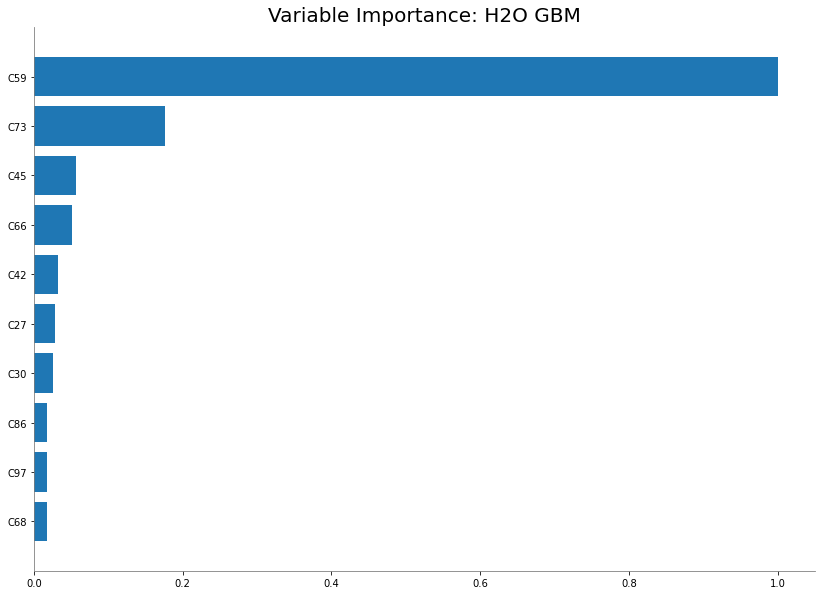

In [203]:
gbm_embeddings.varimp_plot()

In [204]:
top_w2v_features = list(filter(lambda x: x.startswith('C'), map(lambda x: x[0], gbm_embeddings.varimp())))[1:10]
top_w2v_features

['C73', 'C45', 'C66', 'C42', 'C27', 'C30', 'C86', 'C97', 'C68']

In [205]:
from h2o.estimators import H2OGeneralizedLinearEstimator

glm_predictors =  review_vecs.names

glm_embeddings = H2OGeneralizedLinearEstimator(model_id = "glm_embeddings.hex", interactions = top_w2v_features,
                                               family = "binomial"
                                              )
glm_embeddings.train(x = glm_predictors, y = response,
                     training_frame = train, validation_frame = test
                    )

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [206]:
print(glm_embeddings.auc)

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_embeddings.hex


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 5.04E-4 )",136,75,7,py_107_sid_a671




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.025655491657045296
RMSE: 0.1601733175564685
LogLoss: 0.09492959504609902
Null degrees of freedom: 4455
Residual degrees of freedom: 4380
Null deviance: 3513.961139176855
Residual deviance: 846.0125510508343
AIC: 998.0125510508343
AUC: 0.9827481357419149
AUCPR: 0.94005333397175
Gini: 0.9654962714838298

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45450690482804973: 


,,0,1,Error,Rate
0,0,3798.0,60.0,0.0156,(60.0/3858.0)
1,1,86.0,512.0,0.1438,(86.0/598.0)
2,Total,3884.0,572.0,0.0328,(146.0/4456.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.454507,0.875214,165.0
1,max f2,0.126604,0.896910,261.0
2,max f0point5,0.688610,0.915058,121.0
3,max accuracy,0.454507,0.967235,165.0
4,max precision,0.999770,1.000000,0.0
5,max recall,0.000504,1.000000,395.0
6,max specificity,0.999770,1.000000,0.0
7,max absolute_mcc,0.454507,0.856647,165.0
8,max min_per_class_accuracy,0.132103,0.946345,258.0
9,max mean_per_class_accuracy,0.126604,0.948407,261.0



Gains/Lift Table: Avg response rate: 13.42 %, avg score: 13.42 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010099,9.982026e-01,7.451505,7.451505,1.000000,0.999300,1.000000,0.999300,0.075251,0.075251,645.150502,645.150502,0.075251
1,2,0.020422,9.943822e-01,7.289516,7.369620,0.978261,0.996145,0.989011,0.997705,0.075251,0.150502,628.951578,636.962035,0.150242
2,3,0.030072,9.895101e-01,7.451505,7.395897,1.000000,0.992289,0.992537,0.995967,0.071906,0.222408,645.150502,639.589677,0.222149
3,4,0.040171,9.802998e-01,7.451505,7.409876,1.000000,0.984697,0.994413,0.993134,0.075251,0.297659,645.150502,640.987650,0.297400
4,5,0.050269,9.714195e-01,7.451505,7.418239,1.000000,0.976111,0.995536,0.989714,0.075251,0.372910,645.150502,641.823937,0.372650
5,6,0.100090,7.687319e-01,6.914460,7.167479,0.927928,0.904043,0.961883,0.947071,0.344482,0.717391,591.445961,616.747904,0.712985
6,7,0.150135,2.405728e-01,3.709045,6.014668,0.497758,0.506820,0.807175,0.800321,0.185619,0.903010,270.904510,501.466773,0.869573
7,8,0.200180,7.860324e-02,1.035859,4.769966,0.139013,0.134794,0.640135,0.633939,0.051839,0.954849,3.585944,376.996566,0.871646
8,9,0.300045,2.254314e-02,0.234429,3.260382,0.031461,0.041455,0.437547,0.436740,0.023411,0.978261,-76.557063,226.038178,0.783341
9,10,0.400135,1.075582e-02,0.033415,2.453188,0.004484,0.015708,0.329220,0.331423,0.003344,0.981605,-96.658518,145.318757,0.671600




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.026499901046916772
RMSE: 0.16278790202873422
LogLoss: 0.10211639029021113
Null degrees of freedom: 1115
Residual degrees of freedom: 1040
Null deviance: 877.2023817071786
Residual deviance: 227.92378312775122
AIC: 379.9237831277512
AUC: 0.983436630275605
AUCPR: 0.9115107238069988
Gini: 0.96687326055121

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5998123442382717: 


,,0,1,Error,Rate
0,0,955.0,12.0,0.0124,(12.0/967.0)
1,1,22.0,127.0,0.1477,(22.0/149.0)
2,Total,977.0,139.0,0.0305,(34.0/1116.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.599812,0.881944,108.0
1,max f2,0.247667,0.897436,150.0
2,max f0point5,0.721982,0.917293,99.0
3,max accuracy,0.721982,0.969534,99.0
4,max precision,0.999960,1.000000,0.0
5,max recall,0.003228,1.000000,360.0
6,max specificity,0.999960,1.000000,0.0
7,max absolute_mcc,0.599812,0.865166,108.0
8,max min_per_class_accuracy,0.194522,0.946309,158.0
9,max mean_per_class_accuracy,0.131973,0.948842,169.0



Gains/Lift Table: Avg response rate: 13.35 %, avg score: 14.25 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010753,9.988188e-01,7.489933,7.489933,1.000000,0.999458,1.000000,0.999458,0.080537,0.080537,648.993289,648.993289,0.080537
1,2,0.020609,9.957419e-01,6.809030,7.164284,0.909091,0.996862,0.956522,0.998217,0.067114,0.147651,580.902990,616.428363,0.146617
2,3,0.031362,9.917056e-01,6.865772,7.061937,0.916667,0.993511,0.942857,0.996603,0.073826,0.221477,586.577181,606.193672,0.219408
3,4,0.040323,9.836443e-01,5.991946,6.824161,0.800000,0.986676,0.911111,0.994397,0.053691,0.275168,499.194631,582.416107,0.271031
4,5,0.050179,9.752469e-01,7.489933,6.954938,1.000000,0.978998,0.928571,0.991372,0.073826,0.348993,648.993289,595.493768,0.344857
5,6,0.100358,8.303283e-01,7.356184,7.155561,0.982143,0.927877,0.955357,0.959625,0.369128,0.718121,635.618408,615.556088,0.712950
6,7,0.150538,3.511940e-01,3.477469,5.929530,0.464286,0.575437,0.791667,0.831562,0.174497,0.892617,247.746884,492.953020,0.856423
7,8,0.200717,9.232895e-02,1.337488,4.781520,0.178571,0.186489,0.638393,0.670294,0.067114,0.959732,33.748802,378.151965,0.875967
8,9,0.300179,2.533586e-02,0.202431,3.264269,0.027027,0.045631,0.435821,0.463316,0.020134,0.979866,-79.756938,226.426926,0.784416
9,10,0.400538,1.092500e-02,0.133749,2.479888,0.017857,0.017197,0.331096,0.351537,0.013423,0.993289,-86.625120,147.988829,0.684085




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-11-14 13:21:31,0.000 sec,0,1756.980570,0.394295,,,,,,,,,,,,,,
1,,2020-11-14 13:21:31,0.183 sec,1,629.422202,0.146431,,,,,,,,,,,,,,
2,,2020-11-14 13:21:31,0.294 sec,2,493.350372,0.116444,,,,,,,,,,,,,,
3,,2020-11-14 13:21:31,0.390 sec,3,442.599542,0.105946,,,,,,,,,,,,,,
4,,2020-11-14 13:21:31,0.503 sec,4,426.834355,0.102917,,,,,,,,,,,,,,
5,,2020-11-14 13:21:31,0.600 sec,5,423.386404,0.102373,,,,,,,,,,,,,,
6,,2020-11-14 13:21:31,0.699 sec,6,422.924055,0.102351,,,,,,,,,,,,,,
7,,2020-11-14 13:21:31,0.832 sec,7,423.006276,0.102356,0.160173,0.0949296,0.779196,NaN,NaN,7.45151,0.0327648,0.162788,0.102116,0.770934,0.983437,0.911511,7.48993,0.0304659


<bound method ModelBase.auc of >


In [207]:
glm_embeddings.confusion_matrix(valid=True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5998123442382717: 


,,0,1,Error,Rate
0,0,955.0,12.0,0.0124,(12.0/967.0)
1,1,22.0,127.0,0.1477,(22.0/149.0)
2,Total,977.0,139.0,0.0305,(34.0/1116.0)


In [208]:
kmeans.train(x=predictors,
            training_frame=train,
            validation_frame=test)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [209]:
pred = kmeans.predict(test)

kmeans prediction progress: |█████████████████████████████████████████████| 100%


In [210]:
pred

predict
0
0
0
0
0
1
0
0
0
0


In [211]:
test['labels'] =  pred

In [238]:
test.head(10)

target,text_lemmatized,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100,labels
1,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s,-0.00762828,0.0230864,-0.30226,0.0967428,0.010408,-0.0499013,0.0687067,-0.212729,-0.144626,-0.0554523,0.050942,-0.24237,0.0975319,-0.0687599,-0.0419152,-0.124189,-0.293581,0.216416,0.0742509,0.108855,-0.172451,-0.00661499,0.0333667,-0.0621721,0.084391,0.0337786,-0.165926,0.215333,-0.0792341,-0.107513,0.111454,0.178093,-0.0160881,-0.270295,-0.0685811,0.000659249,0.11958,0.213109,-0.0674671,-0.108383,-0.190756,-0.141597,-0.216895,0.212283,0.358174,0.135564,0.16448,0.152021,-0.0595424,0.10433,-0.219421,-0.138108,-0.19909,0.0397189,0.00395114,0.109897,0.354996,-0.0899712,0.218633,0.10469,0.146584,0.094411,0.202303,0.0481459,0.327986,-0.200289,-0.272546,0.227837,0.182889,0.292427,-0.0225554,-0.0566371,-0.283836,-0.015552,0.0937515,-0.10822,-0.0520969,0.00986991,-0.0441816,0.0419072,-0.0749701,0.12206,-0.00110314,-0.242071,-0.0264855,-0.0208607,0.169471,0.167122,0.0438612,0.022828,0.0179388,-0.24981,0.160619,-0.0247788,-0.120752,-0.0785427,0.0214808,-0.178736,0.0166734,-0.175072,0
0,even brother like speak treat like aid patent,-0.0347171,-0.223338,0.0218227,0.0451449,-0.0120001,-0.0303854,-0.0135948,-0.0485829,-0.0784033,-0.0216365,0.00766343,0.0394153,-0.0384493,-0.031644,-0.0273624,0.0307892,0.0227762,0.0275038,-0.0103524,-0.0191216,0.0189733,-0.0365909,0.0133575,0.137548,0.0385986,0.0615256,0.0900693,0.0286644,0.0484191,-0.0334376,-0.0891584,0.0759495,0.0109747,0.116466,0.0898417,-0.0532622,-0.104717,0.11724,0.124237,-0.0238405,-0.151234,0.00554626,0.00102145,-0.0563457,-0.0134619,-0.0208901,0.039121,0.0973918,-0.00106962,0.171469,0.0194041,0.0511892,-0.0141257,-0.0444723,0.04636,-0.0586841,0.138107,-0.0639805,-0.0998668,0.0256639,-0.162155,0.00114633,0.078225,0.0680033,-0.0581244,0.03596,0.0499368,-0.0267762,0.0658853,-0.0279745,-0.0335986,-0.0150098,0.0752771,-0.01717,-0.0703978,-0.127302,0.107199,-0.0552334,-0.0172178,-0.0554576,0.00515212,-0.0409239,-0.0395523,0.0433249,-0.0267527,0.0460473,-0.0382815,-0.00475038,0.0603097,-0.00389802,0.0118156,-0.0140768,0.0100127,0.0104938,0.0685636,0.101741,-0.0431636,-0.054032,0.0237106,-0.0125452,0
0,per request melle melle oru minnaminunginte nurungu vettam set callertune caller press 9 copy friend callertune,0.0611403,-0.151788,-0.176808,0.0721723,-0.0239263,0.0510148,-0.0209631,-0.103761,0.0407052,0.0810445,-0.131333,-0.134526,0.05061,-0.0876272,-0.0248436,0.0728078,-0.183159,0.0997907,0.107641,-0.0427596,-0.145738,-0.134117,-0.0503683,-0.102549,-0.032792,-0.0327348,-0.159729,0.0867077,-0.0144859,-0.0753559,0.155213,0.0238614,0.0522427,-0.088693,-0.0213816,-0.164901,0.0607157,-0.0245053,0.0242661,-0.0185969,0.0113001,-0.0885777,-0.0736326,0.164606,0.065599,-0.00950976,0.166643,0.147263,-0.0243902,0.0918388,-0.0719234,0.0437606,0.0481758,-0.0224325,0.110975,-0.0118896,0.206498,0.0290098,0.0615687,-0.175807,-0.0147954,0.0797581,0.118351,0.129333,-0.0987472,-0.032383,-0.277417,0.0631376,0.0128099,-0.0188118,-0.0654294,-0.0958692,-0.0927346,0.00762427,-0.0852762,-0.073308,0.037174,0.000789942,0.0193054,0.0191646,0.0200054,0.105022,0.114583,-0.0646286,-0.0696201,-0.0505317,0.00667378,0.0519906,-0.0764897,-0.049802,-0.111349,-0.0392649,-0.0282492,0.0875612,0.0682983,0.023973,0.0319096,0.063901,0.138676,-0.0599183,0
1,xxxmobilemovieclub credit click wap link next txt message click httpwap xxxmobilemovieclubcomnqjkgighjjgcbl,0.0504685,-0.0767218,-0.1014,-0.00932921,-0.0244213,-0.0366194,-0.0453492,-0.0898414,-0.023268,-0.0176174,0.00203111,-0

In [261]:
df_spam = test[test['target'] == '1']
df_spam.head(2)

target,text_lemmatized,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100,labels
1,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s,-0.00762828,0.0230864,-0.30226,0.0967428,0.010408,-0.0499013,0.0687067,-0.212729,-0.144626,-0.0554523,0.050942,-0.24237,0.0975319,-0.0687599,-0.0419152,-0.124189,-0.293581,0.216416,0.0742509,0.108855,-0.172451,-0.00661499,0.0333667,-0.0621721,0.084391,0.0337786,-0.165926,0.215333,-0.0792341,-0.107513,0.111454,0.178093,-0.0160881,-0.270295,-0.0685811,0.000659249,0.11958,0.213109,-0.0674671,-0.108383,-0.190756,-0.141597,-0.216895,0.212283,0.358174,0.135564,0.16448,0.152021,-0.0595424,0.10433,-0.219421,-0.138108,-0.19909,0.0397189,0.00395114,0.109897,0.354996,-0.0899712,0.218633,0.10469,0.146584,0.094411,0.202303,0.0481459,0.327986,-0.200289,-0.272546,0.227837,0.182889,0.292427,-0.0225554,-0.0566371,-0.283836,-0.015552,0.0937515,-0.10822,-0.0520969,0.00986991,-0.0441816,0.0419072,-0.0749701,0.12206,-0.00110314,-0.242071,-0.0264855,-0.0208607,0.169471,0.167122,0.0438612,0.022828,0.0179388,-0.24981,0.160619,-0.0247788,-0.120752,-0.0785427,0.0214808,-0.178736,0.0166734,-0.175072,0
1,xxxmobilemovieclub credit click wap link next txt message click httpwap xxxmobilemovieclubcomnqjkgighjjgcbl,0.0504685,-0.0767218,-0.1014,-0.00932921,-0.0244213,-0.0366194,-0.0453492,-0.0898414,-0.023268,-0.0176174,0.00203111,-0.153719,-0.0622693,0.0226741,0.0226549,0.0375308,-0.0267068,0.0973629,0.0476446,0.0154143,-0.198425,0.0389017,0.095413,-0.00506536,0.0734917,0.0101049,-0.141826,0.190977,0.0219755,-0.0608937,0.0557656,0.206317,0.0828681,-0.00304653,0.00270656,-0.0818578,0.0105722,0.0218713,0.0754261,-0.0842325,-0.187374,-0.108939,-0.0824885,0.0245219,0.193693,0.14979,0.106908,0.142587,-0.0738238,0.0188633,-0.134799,-0.0676151,-0.0889225,-0.0246269,-0.0526784,0.143367,0.220849,-0.145739,0.127423,-0.0346809,-0.00828111,0.138415,0.0874198,0.0283978,0.0326437,-0.0734673,-0.0757683,0.113709,0.0302597,0.133669,0.0211117,-0.0326113,-0.1448,-0.0204597,0.0644786,-0.120153,0.0730365,-0.0355877,-0.0455193,0.0154511,-0.00745712,0.144989,-0.00562323,-0.112614,-0.0378304,-0.0819826,0.0552272,0.148646,0.0391193,-0.0261538,0.0266534,-0.169243,0.092008,-0.0260762,0.016149,0.0749647,-0.0349115,-0.186963,0.02299,-0.0236113,0


In [263]:
true_spam = df_spam[df_spam['labels'] == 1]
true_spam

This H2OFrame is empty.


Т.е. фактически алгоритм К-средних не нашёл ниодного спама, что вполне себе плохо

In [264]:
df_ham = test[test['target']=='0']

In [267]:
true_ham = df_ham[df_ham['labels'] == 0]
true_ham.dim

[566, 103]

In [145]:
#' Add  Column: "prediction"
for target in test['target'].values:
  if target == '0':
    for label in test['labels'].va

In [146]:
#test["prediction_2"].table()

prediction_2,Count
False,146
True,959


In [140]:
#m = 146 / 959 * 100
#print('Вероятность ошибки второго рода при проведении кластеризации составила: ' + str(m)+'%')

Вероятность ошибки второго рода при проведении кластеризации составила: 15.224191866527633%


In [143]:
#test["prediction_1"] = (test["labels"] == 0 and test['target']\
 #                     == '1').ifelse("F", "T")

In [144]:
#test["prediction_1"].table()

prediction_1,Count
T,959
F,146


In [ ]:
from h2o.automl import H2OAutoML

automl = H2OAutoML(project_name = 'text_lemmatized', max_runtime_secs = 180, 
                   keep_cross_validation_models = False, keep_cross_validation_predictions = False,
                   nfolds = 3, exclude_algos = ["DRF"], seed = 1234)
automl.train(x = predictors, y = response, training_frame = train, leaderboard_frame = test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [ ]:
automl.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20201114_115004,0.991924,0.0780316,0.949686,0.0527374,0.138883,0.0192884
StackedEnsemble_AllModels_AutoML_20201114_115004,0.99131,0.0816326,0.951083,0.0572419,0.1436,0.0206211
XGBoost_grid__1_AutoML_20201114_115004_model_3,0.990409,0.0702217,0.952388,0.0557034,0.138428,0.0191624
XGBoost_grid__1_AutoML_20201114_115004_model_5,0.989619,0.078351,0.937056,0.0677893,0.149222,0.0222673
XGBoost_grid__1_AutoML_20201114_115004_model_4,0.989152,0.0855027,0.946445,0.0372834,0.148931,0.0221805
DeepLearning_1_AutoML_20201114_115004,0.98802,0.0858935,0.913407,0.0458905,0.156787,0.0245821
GBM_2_AutoML_20201114_115004,0.98784,0.142026,0.936839,0.059806,0.176957,0.0313138
XGBoost_grid__1_AutoML_20201114_115004_model_2,0.987568,0.0854513,0.918583,0.0882606,0.154077,0.0237397
XGBoost_grid__1_AutoML_20201114_115004_model_1,0.987156,0.082085,0.929476,0.071781,0.153567,0.0235829
GBM_grid__1_AutoML_20201114_115004_model_2,0.986713,0.0800844,0.938841,0.0747471,0.149168,0.0222512


In [ ]:
h2o.cluster().shutdown()

H2O session _sid_b057 closed.


**Выводы**
Проведены этапы подготовки данных. Опробованы методы очистки слов: лемматизация и стеммизация. Уже на начальных этапах, стало очевидно, что лемматизация более работоспособна. Т.к. при поверхностном осмотре при стемматизации появились слова типа "crazi", что очевидно не приемлимо, поэтому далее работа была только с лемматизированными словами. 
Слова конвертированы в векторы. Далее проведена кластеризация. При анализе качества оказалось, что не удалось найти ни одного сообщения "спам", что свидетельствует об слабой способности К-средних в данной задаче. 
Затем была модель была обучена алгоритмами ГБМ и ГЛЭ, где были получены впечатляющие результаты.
Ну а вишенкой на торте стала возможность сделать "всё разом" при помощи алгоритма autoML, где auc у модели StackedEnsemble_BestOfFamily_AutoML составила 0,99. 
В целом задание выполнено в полном масштабе. Всё работает. Н2О не перестаёт радовать